In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

In [3]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df_test = pd.read_csv('test.csv')
(df_test.isna().mean())*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.drop("Cabin", axis=1, inplace=True)

In [7]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
df_train["Age"] = df_train["Age"].fillna(df_train.groupby("Pclass")["Age"].transform("mean"))
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [9]:
df_train.dropna(inplace=True)

In [10]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df_train["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [12]:
df_train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [13]:
df_train["Parch"].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [14]:
df_train["SibSp"].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

# Explanatory Data Analysis

In [15]:
df_train.groupby("Survived")["Sex"].value_counts()

Survived  Sex   
0         male      468
          female     81
1         female    231
          male      109
Name: count, dtype: int64

In [16]:
df_train.groupby("Survived")["Parch"].value_counts()

Survived  Parch
0         0        445
          1         53
          2         40
          4          4
          5          4
          3          2
          6          1
1         0        231
          1         65
          2         40
          3          3
          5          1
Name: count, dtype: int64

In [17]:
df_train.groupby("Survived")["Embarked"].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: count, dtype: int64

In [18]:
df_train.groupby("Survived")["SibSp"].value_counts()

Survived  SibSp
0         0        398
          1         97
          2         15
          4         15
          3         12
          8          7
          5          5
1         0        208
          1        112
          2         13
          3          4
          4          3
Name: count, dtype: int64

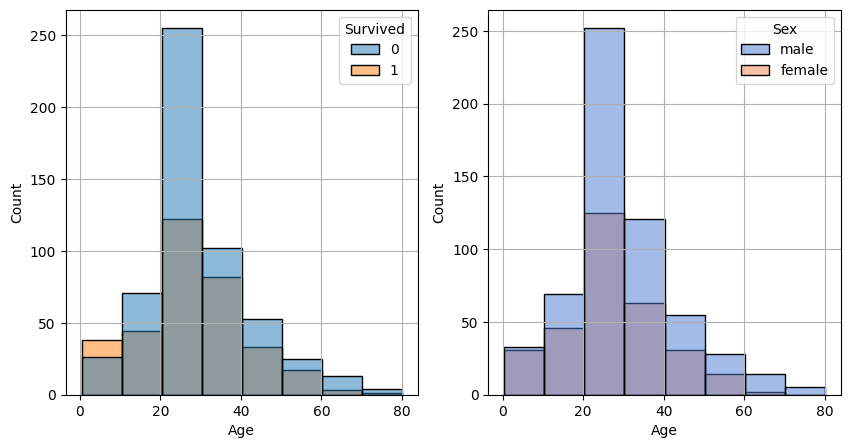

In [19]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
sns.histplot(data=df_train, x="Age", hue="Survived",bins=8, ax=ax[0])
ax[0].grid(True)
sns.histplot(data=df_train, x="Age", hue="Sex",bins=8,palette="muted", ax=ax[1])
ax[1].grid(True)

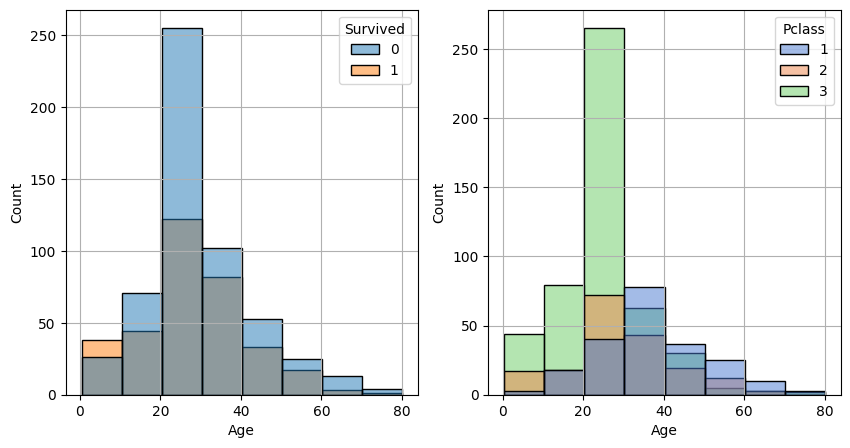

In [20]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
sns.histplot(data=df_train, x="Age", hue="Survived",bins=8, ax=ax[0])
ax[0].grid(True)
sns.histplot(data=df_train, x="Age", hue="Pclass",bins=8,palette="muted", ax=ax[1])
ax[1].grid(True)

Text(0.5, 0.98, 'Survived vs Embarked')

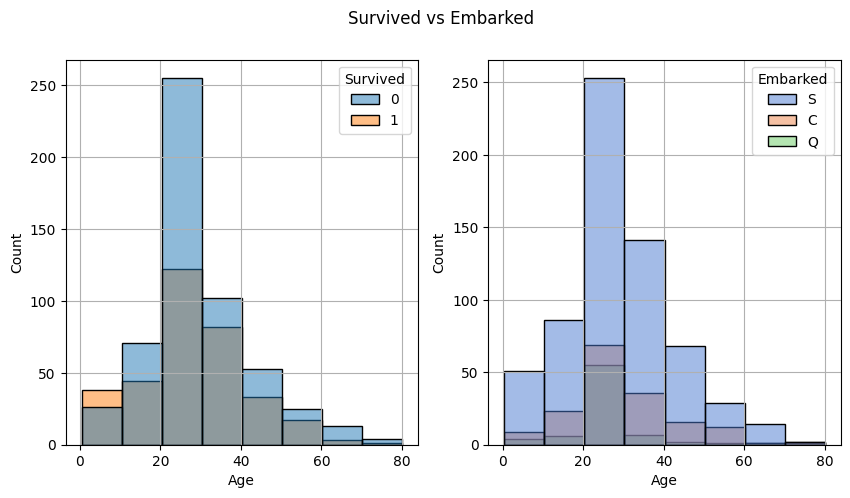

In [21]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
sns.histplot(data=df_train, x="Age", hue="Survived",bins=8, ax=ax[0])
ax[0].grid(True)
sns.histplot(data=df_train, x="Age", hue="Embarked",bins=8,palette="muted", ax=ax[1])
ax[1].grid(True)

plt.suptitle("Survived vs Embarked")

In [22]:
# Siblings and spouses Groups
sib_0 = df_train[df_train["SibSp"] == 0]
sib_1 = df_train[df_train["SibSp"] == 1]
sib_2 = df_train[df_train["SibSp"] > 1]

# Parents and Children Groups
parch_0 = df_train[df_train["Parch"] == 0]
parch_1 = df_train[df_train["Parch"] == 1]
parch_2 = df_train[df_train["Parch"] > 1]

# survive or non-survived group
survived = df_train[df_train["Survived"] == 1]
non_survived = df_train[df_train["Survived"] == 0]



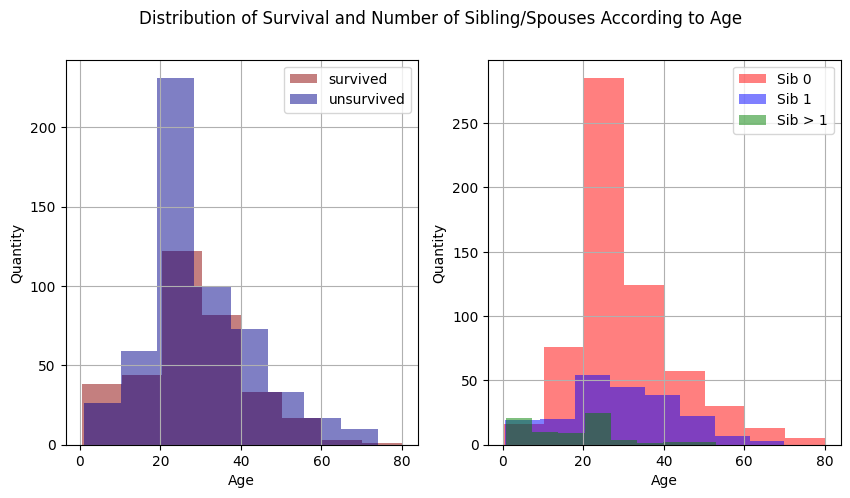

In [23]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
ax[0].hist(survived["Age"],bins=8, color="darkred",alpha=0.5) 
ax[0].hist(non_survived["Age"],bins=8, color="darkblue",alpha=0.5)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Quantity")
ax[0].legend(["survived","unsurvived"])
ax[0].grid(True)

ax[1].hist(sib_0["Age"],bins=8, color="red",alpha=0.5) 
ax[1].hist(sib_1["Age"],bins=8, color="blue",alpha=0.5)
ax[1].hist(sib_2["Age"],bins=8, color="green",alpha=0.5)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Quantity")
ax[1].legend(["Sib 0","Sib 1", "Sib > 1"])
ax[1].grid(True)

fig.suptitle("Distribution of Survival and Number of Sibling/Spouses According to Age")
plt.show()

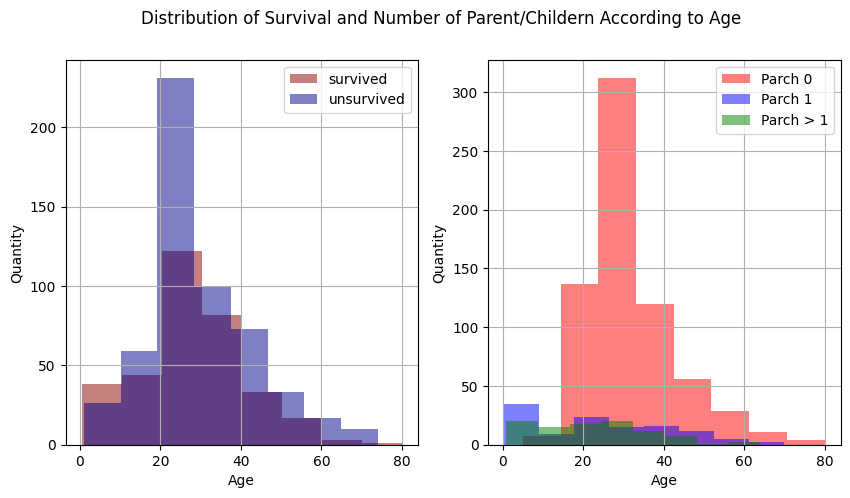

In [24]:
fig, ax = plt.subplots(figsize=(10,5),nrows=1,ncols=2)
ax[0].hist(survived["Age"],bins=8, color="darkred",alpha=0.5) 
ax[0].hist(non_survived["Age"],bins=8, color="darkblue",alpha=0.5)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Quantity")
ax[0].legend(["survived","unsurvived"])
ax[0].grid(True)

ax[1].hist(parch_0["Age"],bins=8, color="red",alpha=0.5) 
ax[1].hist(parch_1["Age"],bins=8, color="blue",alpha=0.5)
ax[1].hist(parch_2["Age"],bins=8, color="green",alpha=0.5)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Quantity")
ax[1].legend(["Parch 0","Parch 1", "Parch > 1"])
ax[1].grid(True)

fig.suptitle("Distribution of Survival and Number of Parent/Childern According to Age")
plt.show()

# Building Model

In [25]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [26]:
X = pd.get_dummies(df_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare","Embarked"]])
y = df_train["Survived"]

In [27]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.00000,1,0,7.2500,False,True,False,False,True
1,1,38.00000,1,0,71.2833,True,False,True,False,False
2,3,26.00000,0,0,7.9250,True,False,False,False,True
3,1,35.00000,1,0,53.1000,True,False,False,False,True
4,3,35.00000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,False,True,False,False,True
887,1,19.00000,0,0,30.0000,True,False,False,False,True
888,3,25.14062,1,2,23.4500,True,False,False,False,True
889,1,26.00000,0,0,30.0000,False,True,True,False,False


In [28]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegressionCV
log_model = LogisticRegressionCV(cv=10, random_state=42)
log_model.fit(X_train, y_train)

c:\Users\faraf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\faraf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

LogisticRegressionCV(cv=10, random_state=42)

In [31]:
y_pred = log_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [32]:
log_model.coef_

array([[-6.75247056e-01, -3.50421777e-02, -2.79956659e-01,
        -9.59993914e-03,  5.71602549e-03,  8.77549317e-01,
        -8.77256191e-01,  1.70306822e-01, -3.47649189e-04,
        -1.69666046e-01]])

In [33]:
log_model_coef = pd.DataFrame(index=X.columns,data=log_model.coef_[0],columns=['coef'])
log_model_coef.reset_index(inplace=True)
log_model_coef = log_model_coef.sort_values(by="coef",ascending=False)
log_model_coef

,index,coef
5,Sex_female,0.877549
7,Embarked_C,0.170307
4,Fare,0.005716
8,Embarked_Q,-0.000348
3,Parch,-0.009600
1,Age,-0.035042
9,Embarked_S,-0.169666
2,SibSp,-0.279957
0,Pclass,-0.675247
6,Sex_male,-0.877256


C:\Users\faraf\AppData\Local\Temp\ipykernel_18460\1593324348.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coef",y="index",data=log_model_coef, palette="viridis")


<Axes: xlabel='coef', ylabel='index'>

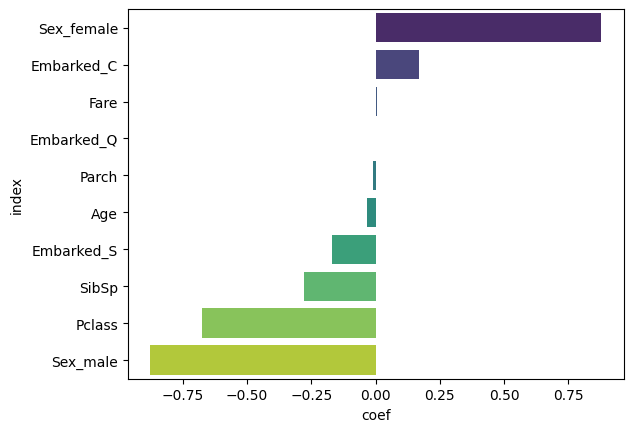

In [34]:
sns.barplot(x="coef",y="index",data=log_model_coef, palette="viridis")

In [35]:
log_model_coef["odd"] = np.exp(log_model_coef["coef"])
log_model_coef

,index,coef,odd
5,Sex_female,0.877549,2.404999
7,Embarked_C,0.170307,1.185669
4,Fare,0.005716,1.005732
8,Embarked_Q,-0.000348,0.999652
3,Parch,-0.009600,0.990446
1,Age,-0.035042,0.965565
9,Embarked_S,-0.169666,0.843947
2,SibSp,-0.279957,0.755816
0,Pclass,-0.675247,0.509031
6,Sex_male,-0.877256,0.415923


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
accuracy_score(y_test, y_pred)

0.8239700374531835

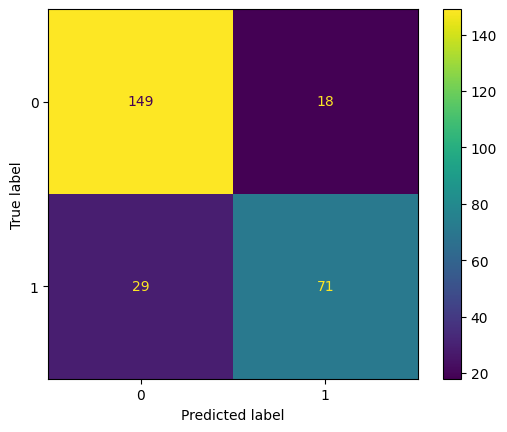

In [37]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       167
           1       0.80      0.71      0.75       100

    accuracy                           0.82       267
   macro avg       0.82      0.80      0.81       267
weighted avg       0.82      0.82      0.82       267



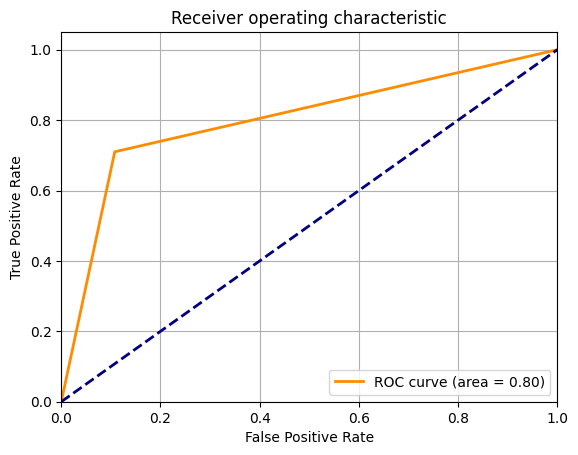

In [39]:
from sklearn.metrics import auc, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

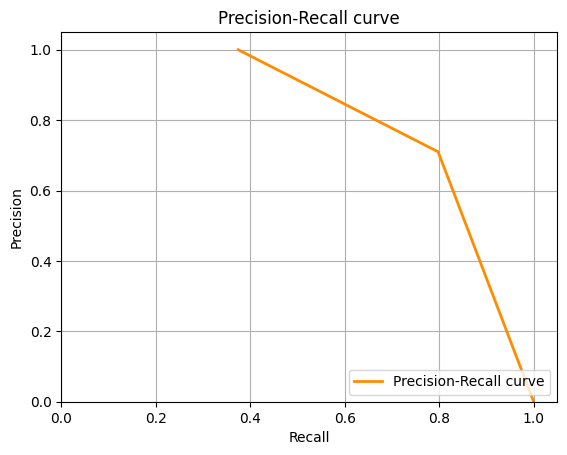

In [40]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(precision, recall, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [41]:
precision_recall_curve(y_test, y_pred)

(array([0.37453184, 0.79775281, 1.        ]),
 array([1.  , 0.71, 0.  ]),
 array([0, 1], dtype=int64))

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 4, 5, 6, 7],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

grid_search.best_params_

c:\Users\faraf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
4860 fits failed out of a total of 14580.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2470 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\faraf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\faraf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\faraf\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [43]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42)
dt_model.fit(X_train, y_train)
pred_dt = dt_model.predict(X_test)
accuracy_score(y_test, pred_dt)

0.8277153558052435

In [44]:
pred_dt

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [45]:
dt_model.feature_importances_

array([0.14647618, 0.16294572, 0.05623241, 0.00881378, 0.20878645,
       0.11682873, 0.26892757, 0.01772072, 0.        , 0.01326843])

In [46]:
features_important = pd.DataFrame(index=X.columns,data=dt_model.feature_importances_,columns=['feature_importance'])
features_important.reset_index(inplace=True)
features_important = features_important.sort_values(by="feature_importance",ascending=False)
features_important

,index,feature_importance
6,Sex_male,0.268928
4,Fare,0.208786
1,Age,0.162946
0,Pclass,0.146476
5,Sex_female,0.116829
2,SibSp,0.056232
7,Embarked_C,0.017721
9,Embarked_S,0.013268
3,Parch,0.008814
8,Embarked_Q,0.000000


C:\Users\faraf\AppData\Local\Temp\ipykernel_18460\3885802549.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="index", x="feature_importance", data=features_important, palette="rocket")


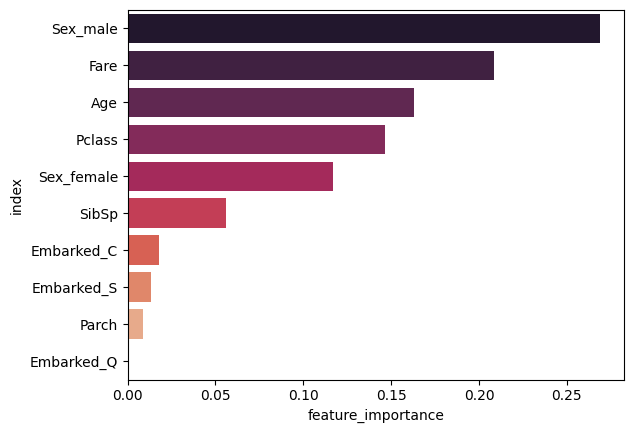

In [47]:
sns.barplot(y="index", x="feature_importance", data=features_important, palette="rocket")
plt.show()

In [48]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       167
           1       0.83      0.68      0.75       100

    accuracy                           0.83       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.83      0.82       267



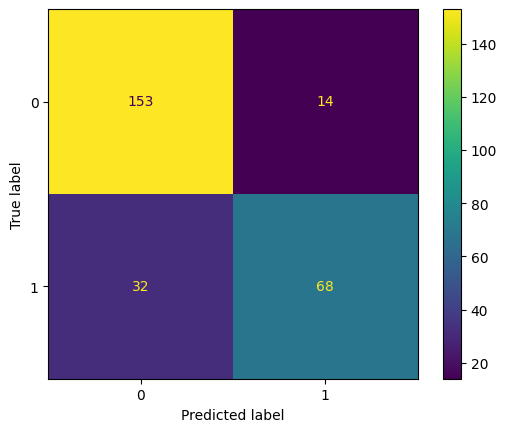

In [49]:
cm = confusion_matrix(y_test, pred_dt)
ConfusionMatrixDisplay(cm).plot()

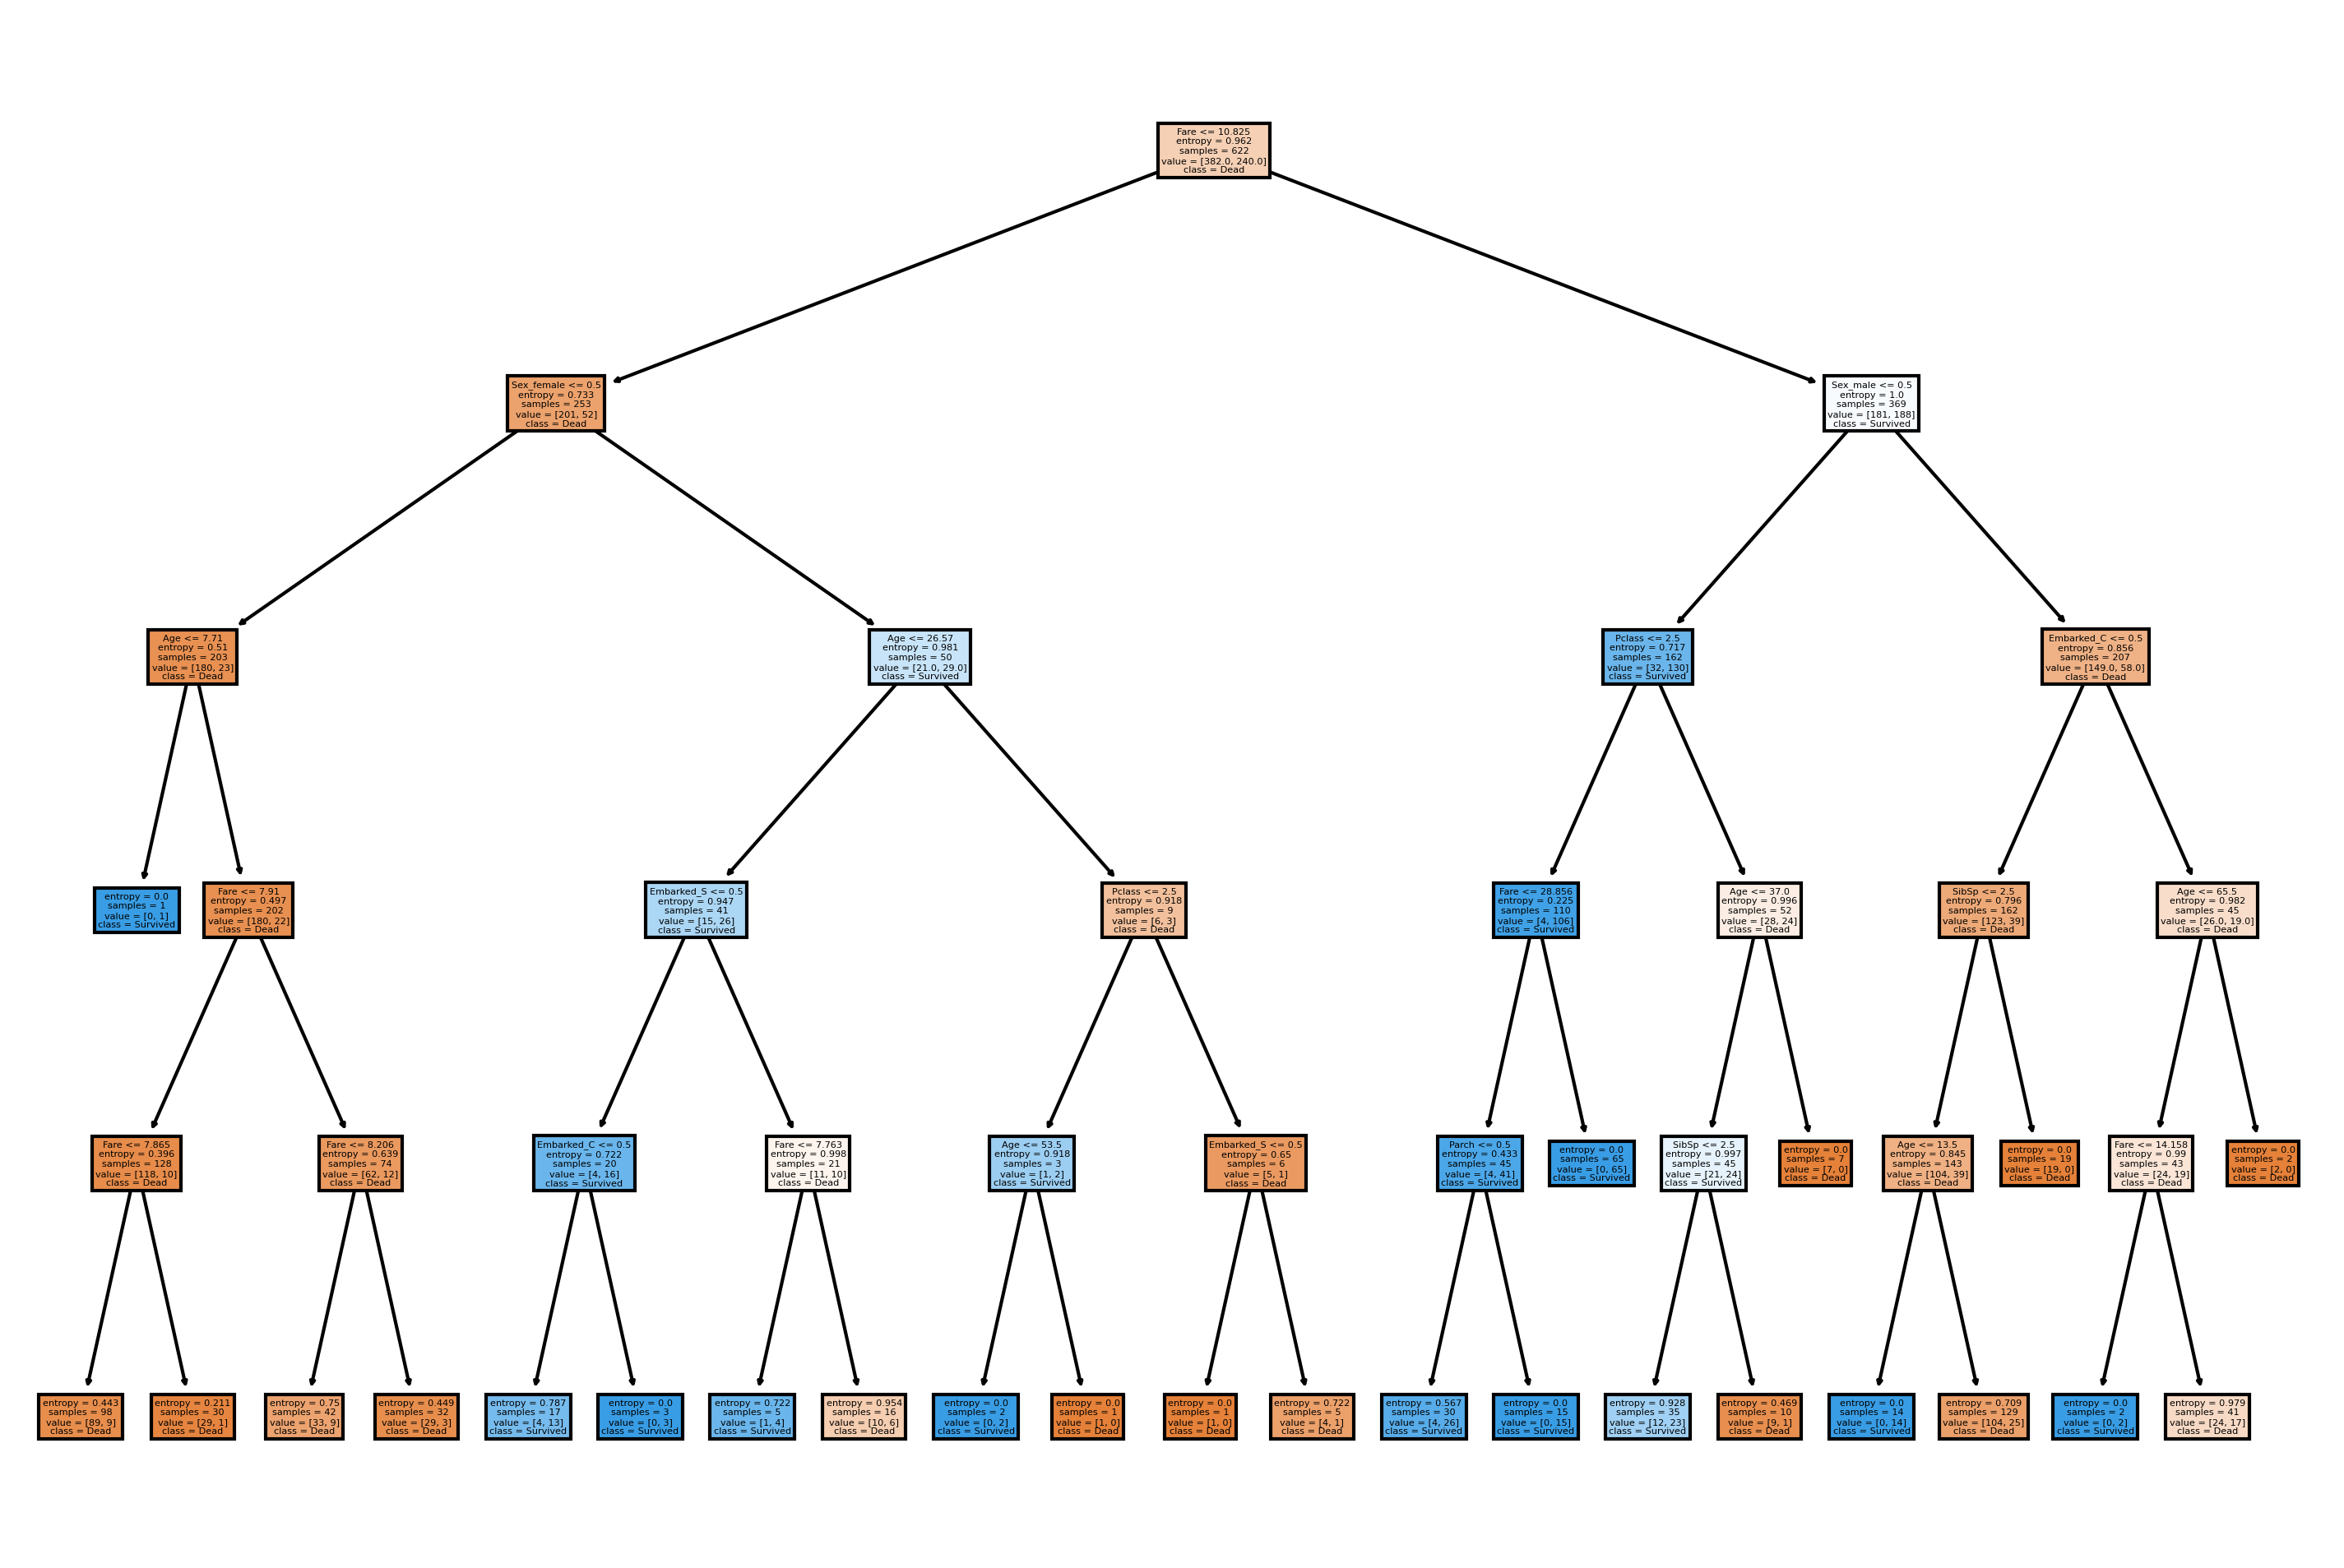

In [50]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8), dpi=300)
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Dead', 'Survived'])
plt.show()

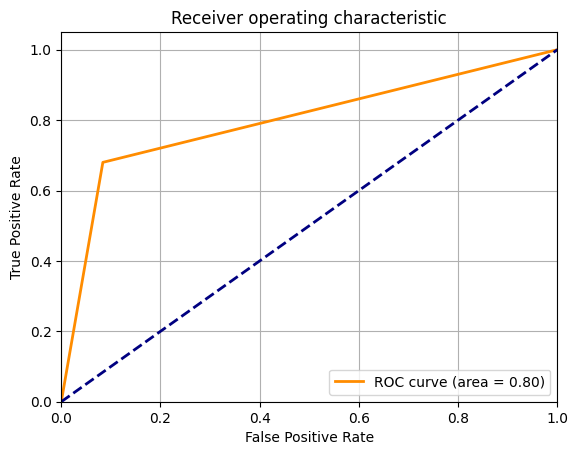

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, pred_dt)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

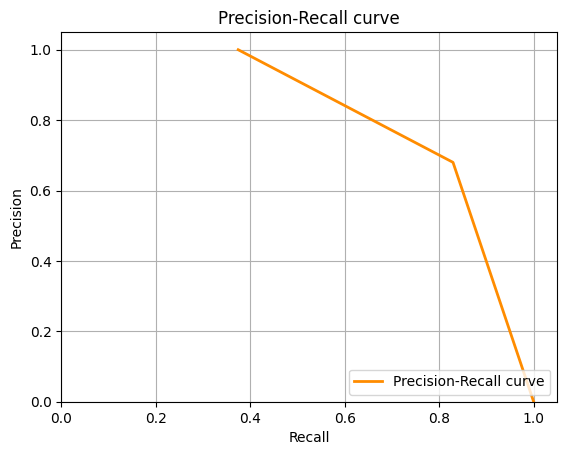

In [52]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, pred_dt)

plt.figure()
plt.plot(precision, recall, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [53]:
precision_recall_curve(y_test, pred_dt)

(array([0.37453184, 0.82926829, 1.        ]),
 array([1.  , 0.68, 0.  ]),
 array([0, 1], dtype=int64))

In [54]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
df_test.drop(['PassengerId', 'Name', 'Ticket','Cabin' ], axis=1, inplace=True)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [56]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [57]:
df_test["Age"] = df_test["Age"].fillna(df_test.groupby("Pclass")["Age"].transform("mean"))
df_test["Fare"] = df_test["Fare"].fillna(df_test["Fare"].mean())

In [58]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [59]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.500000,0,0,7.8292,Q
1,3,female,47.000000,1,0,7.0000,S
2,2,male,62.000000,0,0,9.6875,Q
3,3,male,27.000000,0,0,8.6625,S
4,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,24.027945,0,0,8.0500,S
414,1,female,39.000000,0,0,108.9000,C
415,3,male,38.500000,0,0,7.2500,S
416,3,male,24.027945,0,0,8.0500,S


In [60]:
submit = pd.get_dummies(df_test)
submit

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.500000,0,0,7.8292,False,True,False,True,False
1,3,47.000000,1,0,7.0000,True,False,False,False,True
2,2,62.000000,0,0,9.6875,False,True,False,True,False
3,3,27.000000,0,0,8.6625,False,True,False,False,True
4,3,22.000000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
413,3,24.027945,0,0,8.0500,False,True,False,False,True
414,1,39.000000,0,0,108.9000,True,False,True,False,False
415,3,38.500000,0,0,7.2500,False,True,False,False,True
416,3,24.027945,0,0,8.0500,False,True,False,False,True


In [61]:
pred1_test = dt_model.predict(submit)
pred1_test


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
df_pred1 = pd.DataFrame(pred1_test, columns=['Survived'])
df_pred1.value_counts()

Survived
0           283
1           135
Name: count, dtype: int64

In [63]:
pred2_test = log_model.predict(submit)
df_pred2 = pd.DataFrame(pred2_test, columns=['Survived'])
df_pred2.value_counts()

Survived
0           266
1           152
Name: count, dtype: int64

In [64]:
pred2_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
df_pred2.reset_index(inplace=True)
df_pred2["index"] = range(892,1310)
df_pred2

,index,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
df_pred2.rename(columns={"index": "PassengerId"}, inplace=True)
df_pred2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
df_pred1.reset_index(inplace=True)
df_pred1["index"] = range(892,1310)
df_pred1

,index,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [69]:
df_pred1.rename(columns={"index": "PasenggerId"}, inplace=True)

In [70]:
df_pred1

,PasenggerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
df_pred1.columns = ["PassengerId", "Survived"]
df_pred1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
df_pred2.columns = ["PassengerId", "Survived"]
df_pred2

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
df_pred1.to_csv("submit_titanic_1.csv", index=False)
df_pred2.to_csv("submit_titanic_2.csv", index=False)

In [75]:
pd.read_csv("submit_titanic_1.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
